# Preparations

In [1]:
import Pkg
Pkg.DEFAULT_IO[] = stdout;

#### Fetch Required Packages

In [2]:
using BifurcationKit
using Catalyst
using DifferentialEquations
using LinearAlgebra
using Plots, Plots.Measures
using Polynomials
using Revise
using Setfield
using Statistics
using StatsPlots

#### Other

In [3]:
gr(); 
default(framestyle=:box,grid=false,fmt=:png,guidefontsize=14);

# Make Figures

## Figure 1

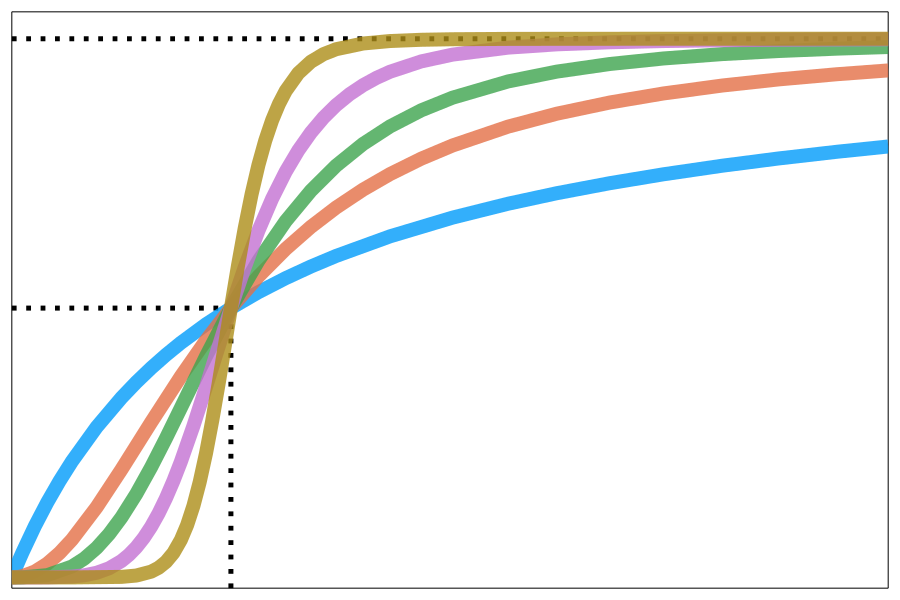

In [23]:
lw = 14; la = 0.8;
hill(x,v,K,n) = v*(x^n)/(x^n+K^n)
plot([1.,1.],[-0.05,0.5],lw=5,linestyle=:dot,color=:black,label="")
plot!([0.0,1.],[0.5,0.5],lw=5,linestyle=:dot,color=:black,label="")
plot!([0.,5.0],[1.,1.],lw=5,linestyle=:dot,color=:black,label="")
plot!(x->hill(x,1.,1.,1),0,5,label="n = 1",lw=lw,la=la,color=1)
plot!(x->hill(x,1.,1.,2),0,5,label="n = 2",lw=lw,la=la,color=2)
plot!(x->hill(x,1.,1.,3),0,5,label="n = 3",lw=lw,la=la,color=3)
plot!(x->hill(x,1.,1.,5),0,5,label="n = 5",lw=lw,la=la,color=4)
plot!(x->hill(x,1.,1.,10),0,5,label="n = 10",lw=lw,la=la,color=5)
hill_figure = plot!(legend=:none,xlimit=(0.,4.),ylimit=(-0.02,1.05),legendfontsize=10,xticks=[],yticks=[],xguide="",yguide="",size=(900,600))

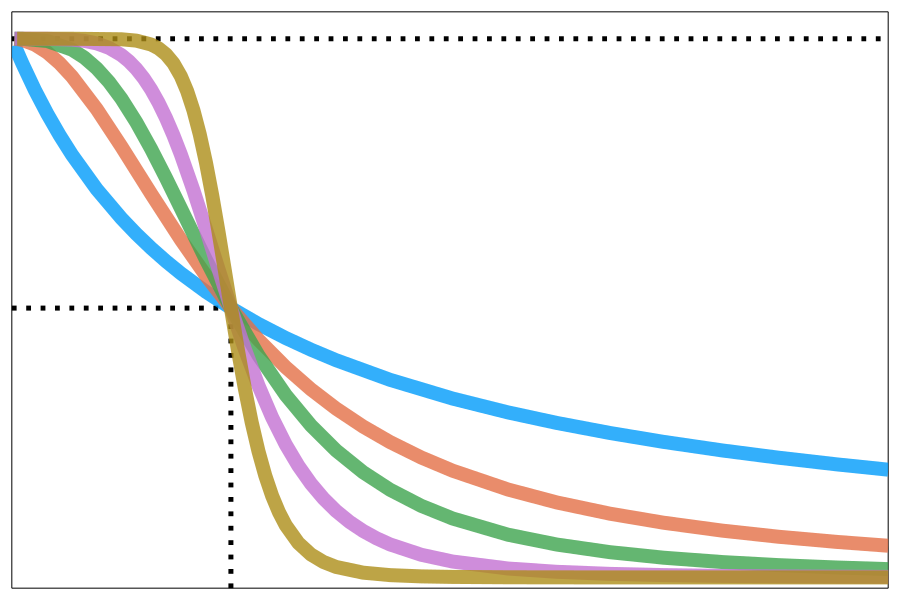

In [24]:
lw = 14; la = 0.8;
hill(x,v,K,n) = v*(x^n)/(x^n+K^n)
plot([1.,1.],[-0.05,0.5],lw=5,linestyle=:dot,color=:black,label="")
plot!([0.0,1.],[0.5,0.5],lw=5,linestyle=:dot,color=:black,label="")
plot!([0.,5.0],[1.,1.],lw=5,linestyle=:dot,color=:black,label="")
plot!(x->hill(x,1.,1.,-1),0,5,label="n = 1",lw=lw,la=la,color=1)
plot!(x->hill(x,1.,1.,-2),0,5,label="n = 2",lw=lw,la=la,color=2)
plot!(x->hill(x,1.,1.,-3),0,5,label="n = 3",lw=lw,la=la,color=3)
plot!(x->hill(x,1.,1.,-5),0,5,label="n = 5",lw=lw,la=la,color=4)
plot!(x->hill(x,1.,1.,-10),0,5,label="n = 10",lw=lw,la=la,color=5)
hill_figure_repress = plot!(legend=:none,xlimit=(0.,4.),ylimit=(-0.02,1.05),legendfontsize=10,xticks=[],yticks=[],xguide="",yguide="",size=(900,600))

In [26]:
savefig(hill_figure,"Figures/Figure1/hill_activation.png")
savefig(hill_figure,"Figures/Figure1/hill_activation.svg")
savefig(hill_figure_repress,"Figures/Figure1/hill_repression.png")
savefig(hill_figure_repress,"Figures/Figure1/hill_repression.svg")

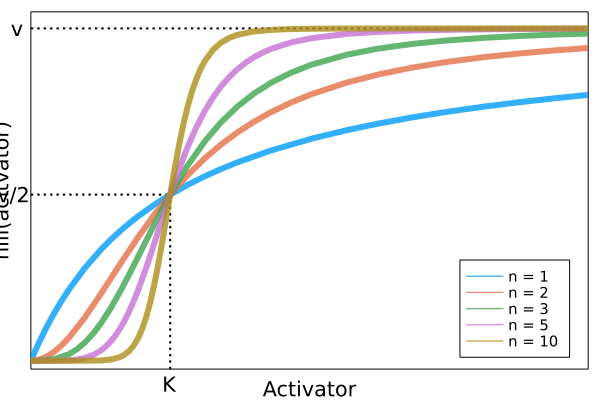

In [8]:
lw = 6;
hill(x,v,K,n) = v*(x^n)/(x^n+K^n)
plot([1.,1.],[-0.05,0.5],lw=2,linestyle=:dot,color=:black,label="")
plot!([0.0,1.],[0.5,0.5],lw=2,linestyle=:dot,color=:black,label="")
plot!([0.,5.0],[1.,1.],lw=2,linestyle=:dot,color=:black,label="")
plot!(x->hill(x,1.,1.,1),0,5,label="n = 1",lw=lw,la=0.8,color=1)
plot!(x->hill(x,1.,1.,2),0,5,label="n = 2",lw=lw,la=0.8,color=2)
plot!(x->hill(x,1.,1.,3),0,5,label="n = 3",lw=lw,la=0.8,color=3)
plot!(x->hill(x,1.,1.,5),0,5,label="n = 5",lw=lw,la=0.8,color=4)
plot!(x->hill(x,1.,1.,10),0,5,label="n = 10",lw=lw,la=0.8,color=5)
plot!(legend=:bottomright,xlimit=(0.,4.),ylimit=(-0.025,1.05),legendfontsize=10,xticks=[],yticks=[],xguide="Activator",yguide="hill(acitvator)")
thesis_figure_1 = annotate!([(1,-0.07,"K"),(-0.13,0.5,"v/2"),(-0.1,1,"v")]) 

In [136]:
savefig(thesis_figure_1,"Figures - Thesis/hill_functions.png")

## Figure 2

In [52]:
rn = @reaction_network begin
    (p,d), 0 <--> X
end p d;
parameters = [.5,0.05]
u0 = [1.]
tend = 100.;

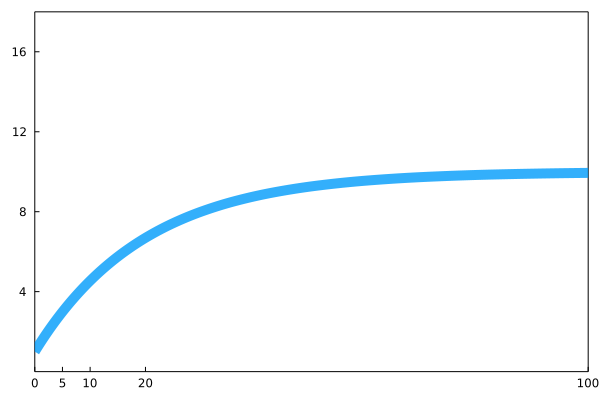

In [91]:
prob_RRE = ODEProblem(rn,u0,(0.,tend),parameters)
sol_RRE = solve(prob_RRE,Rosenbrock23()); 
plot(sol_RRE,lw=10,la=0.8,label="Simulation");
RRE_interpretation_plot = plot!(xguide="",yguide="",ylimit=(0.,18.),legend=:none,legendfontsize=15,xticks=[0,5,10,20,100],yticks=[4,8,12,16])

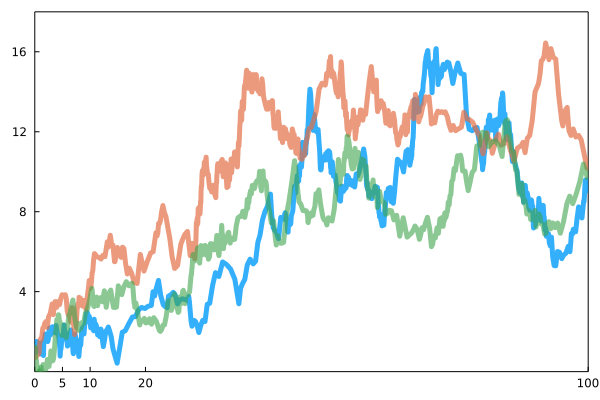

In [101]:
lw = 5; la = 0.8;
prob_CLE = SDEProblem(rn,u0,(0.,tend),parameters)
sol_CLE1 = solve(prob_CLE,ImplicitEM()); 
plot(sol_CLE1,lw=lw,la=0.8,label="Simulation 1");
sol_CLE2 = solve(prob_CLE,ImplicitEM()); 
plot!(sol_CLE2,lw=lw,la=0.7,label="Simulation 2");
sol_CLE3 = solve(prob_CLE,ImplicitEM()); 
plot!(sol_CLE3,lw=lw,la=0.6,label="Simulation 3");
CLE_interpretation_plot = plot!(xguide="",yguide="",legend=:none,legendfontsize=15,ylimit=(0.,18.),xticks=[0,5,10,20,100],yticks=[4,8,12,16])

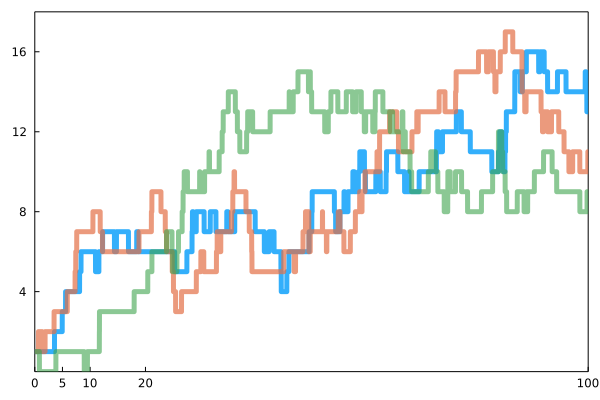

In [106]:
lw = 5; la = 0.8;
prob_Gillespie = DiscreteProblem(rn,Int64.(u0),(0.,tend),parameters)
prob_Gillespie = JumpProblem(rn,prob_Gillespie,Direct())
sol_Gillespie1 = solve(prob_Gillespie,SSAStepper()); 
plot(sol_Gillespie1,lw=lw,la=0.8,label="Simulation 1");
sol_Gillespie2 = solve(prob_Gillespie,SSAStepper()); 
plot!(sol_Gillespie2,lw=lw,la=0.7,label="Simulation 2");
sol_Gillespie3 = solve(prob_Gillespie,SSAStepper()); 
plot!(sol_Gillespie3,lw=lw,la=0.6,label="Simulation 3");
Gillespie_interpretation_plot = plot!(xguide="",yguide="",legend=:none,legendfontsize=15,ylimit=(0.,18.),xticks=[0,5,10,20,100],yticks=[4,8,12,16])

In [67]:
function cme(du,u,p,t)
    λ,β = p; n = length(du);
    du[1] = β*u[2] - λ*u[1]; 
    du[n] = λ*u[n-1] - β*(n-1)*u[n]; 
    for i = 2:(n-1)
        du[i] = λ*u[i-1] - (λ+β*(i-1))*u[i] + β*i*u[i+1]; 
    end
end

function my_bar_plot!(data;lw=3,la=0.8,color=:blue,label="")
    xs = []; ys = [];
    foreach(i -> push!(xs,i-1.5,i-0.5), 1:length(data))
    foreach(d -> push!(ys,d,d), data)
    return plot!(xs,ys,lw=lw;la=la,color=color,label=label)
end;

In [77]:
sol_CME = solve(ODEProblem(cme,setindex!(zeros(200),1.0,2),(0.,100.),parameters),Rosenbrock23(),saveat=1.);

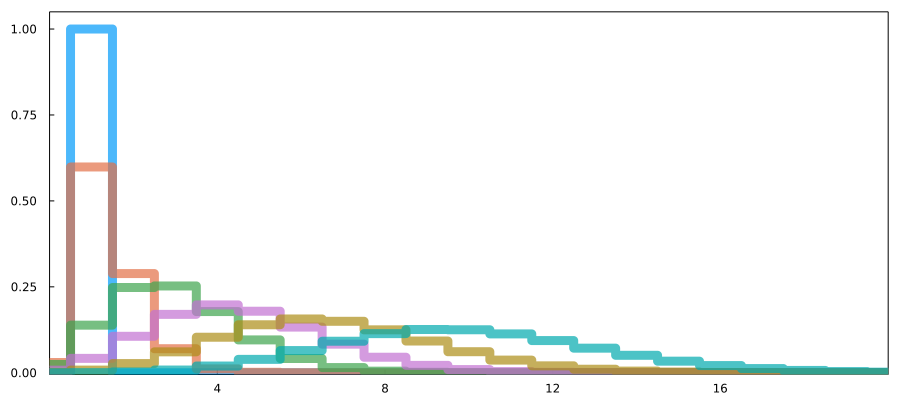

In [113]:
plot(); lw = 9; la = 0.7;
my_bar_plot!(sol_CME[findfirst(sol_CME.t.==0.0)][1:end],lw=lw,la=la,color=1,label="Time = 0"); 
my_bar_plot!(sol_CME[findfirst(sol_CME.t.==1.0)][1:end],lw=lw,la=la,color=2,label="Time = 1"); 
my_bar_plot!(sol_CME[findfirst(sol_CME.t.==5.0)][1:end],lw=lw,la=la,color=3,label="Time = 5");
my_bar_plot!(sol_CME[findfirst(sol_CME.t.==10.0)][1:end],lw=lw,la=la,color=4,label="Time = 10");
my_bar_plot!(sol_CME[findfirst(sol_CME.t.==20.0)][1:end],lw=lw,la=la,color=5,label="Time = 20");
my_bar_plot!(sol_CME[findfirst(sol_CME.t.==100.0)][1:end],lw=lw,la=la,color=6,label="Time = 100");
CME_interpretation_plot = plot!(xguide="",yguide="",xlimit=(0.,20.),ylimit=(-0.005,1.05),legendfontsize=15,xticks=[4,8,12,16],yticks=[0.0,0.25,0.50,0.75,1.0],legend=:none,size=(900,400))

In [58]:
A(i,u,λ,β,grid) = (0 < i <= length(grid)) ? u[i]*(λ-β*grid[i]) : 0.0
B(i,u,λ,β,grid) = (0 < i <= length(grid)) ? u[i]*(λ+β*grid[i]) : 0.0
function cfpe(du,u,p,t)
    λ,β = p
    for i = 1:length(grid)
        du[i] = - (1/Δx) * (A(i,u,λ,β,grid) - A(i-1,u,λ,β,grid)) + (0.5/Δx^2) * (B(i+1,u,λ,β,grid) -2*B(i,u,λ,β,grid) + B(i-1,u,λ,β,grid))
    end
end
CFPE_get_y(sol_CFPE,t) = sol_CFPE[findfirst(sol_CFPE.t.==t)]/(sol_CFPE.t[2]*sum(sol_CFPE[findfirst(sol_CFPE.t.==t)]));

In [59]:
grid = 0:0.05:200.0; Δx = grid[2]
u0_CFPE = zeros(length(grid)); u0_CFPE[findfirst(grid.>=1.0)] = 1;
prob_CFPE = ODEProblem(cfpe,u0_CFPE,(0.,tend),parameters);
@time sol_CFPE = solve(prob_CFPE,tstops=0:0.05:tend,saveat=0.05);

117.697232 seconds (1.40 G allocations: 22.142 GiB, 3.15% gc time, 3.10% compilation time)


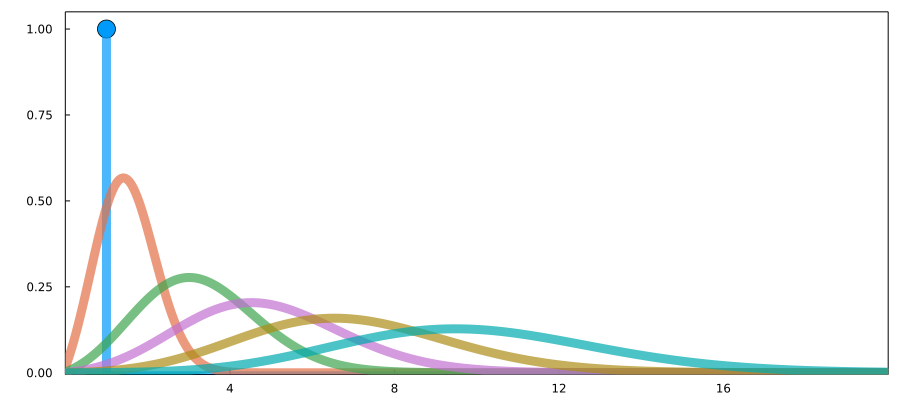

In [116]:
#plot(sol[findfirst(sol.t.==0.5)])
h = 1.0; lw = 9; la = 0.7;
scatter((u0[1],h),markersize=10,markershape=:circle,color=1,label="")
plot!([u0[1],u0[1]],[0,h],color=1,label="Time = 0",lw=lw,la=la)
plot!([0,tend],[0,0],color=1,label="",lw=3,la=0.7)
plot!(grid,CFPE_get_y(sol_CFPE,1.0),lw=lw,la=la,label="Time = 1",color=2)
plot!(grid,CFPE_get_y(sol_CFPE,5.0),lw=lw,la=la,label="Time = 5",color=3)
plot!(grid,CFPE_get_y(sol_CFPE,10.0),lw=lw,la=la,label="Time = 10",color=4)
plot!(grid,CFPE_get_y(sol_CFPE,20.0),lw=lw,la=la,label="Time = 20",color=5)
plot!(grid,CFPE_get_y(sol_CFPE,100.0),lw=lw,la=la,label="Time = 100",color=6)
CFPE_interpretation_plot = plot!(xguide="",yguide="",xlimit=(0.,20.),ylimit=(-0.005,1.05),legendfontsize=15,xticks=[4,8,12,16],yticks=[0.0,0.25,0.50,0.75,1.0],left_margin=5mm,legend=:none,size=(900,400))

In [117]:
savefig(plot!(CFPE_interpretation_plot,xguide="",yguide="",tickfontsize=12,legend=:none),"Figures/Figure2/fig2_generated_CFPE.png")
savefig(plot!(CFPE_interpretation_plot,xguide="",yguide="",tickfontsize=12,legend=:none),"Figures/Figure2/fig2_generated_CFPE.svg")
savefig(plot!(CME_interpretation_plot,xguide="",yguide="",tickfontsize=12,legend=:none),"Figures/Figure2/fig2_generated_CME.png")
savefig(plot!(CME_interpretation_plot,xguide="",yguide="",tickfontsize=12,legend=:none),"Figures/Figure2/fig2_generated_CME.svg")
savefig(plot!(Gillespie_interpretation_plot,xguide="",yguide="",tickfontsize=12,legend=:none),"Figures/Figure2/fig7_generated_Gillespie.png")
savefig(plot!(Gillespie_interpretation_plot,xguide="",yguide="",tickfontsize=12,legend=:none),"Figures/Figure2/fig2_generated_Gillespie.svg")
savefig(plot!(CLE_interpretation_plot,xguide="",yguide="",tickfontsize=12,legend=:none),"Figures/Figure2/fig2_generated_CLE.png")
savefig(plot!(CLE_interpretation_plot,xguide="",yguide="",tickfontsize=12,legend=:none),"Figures/Figure2/fig2_generated_CLE.svg")
savefig(plot!(RRE_interpretation_plot,xguide="",yguide="",tickfontsize=12,legend=:none),"Figures/Figure2/fig2_generated_RRE.png")
savefig(plot!(RRE_interpretation_plot,xguide="",yguide="",tickfontsize=12,legend=:none),"Figures/Figure2/fig2_generated_RRE.svg")

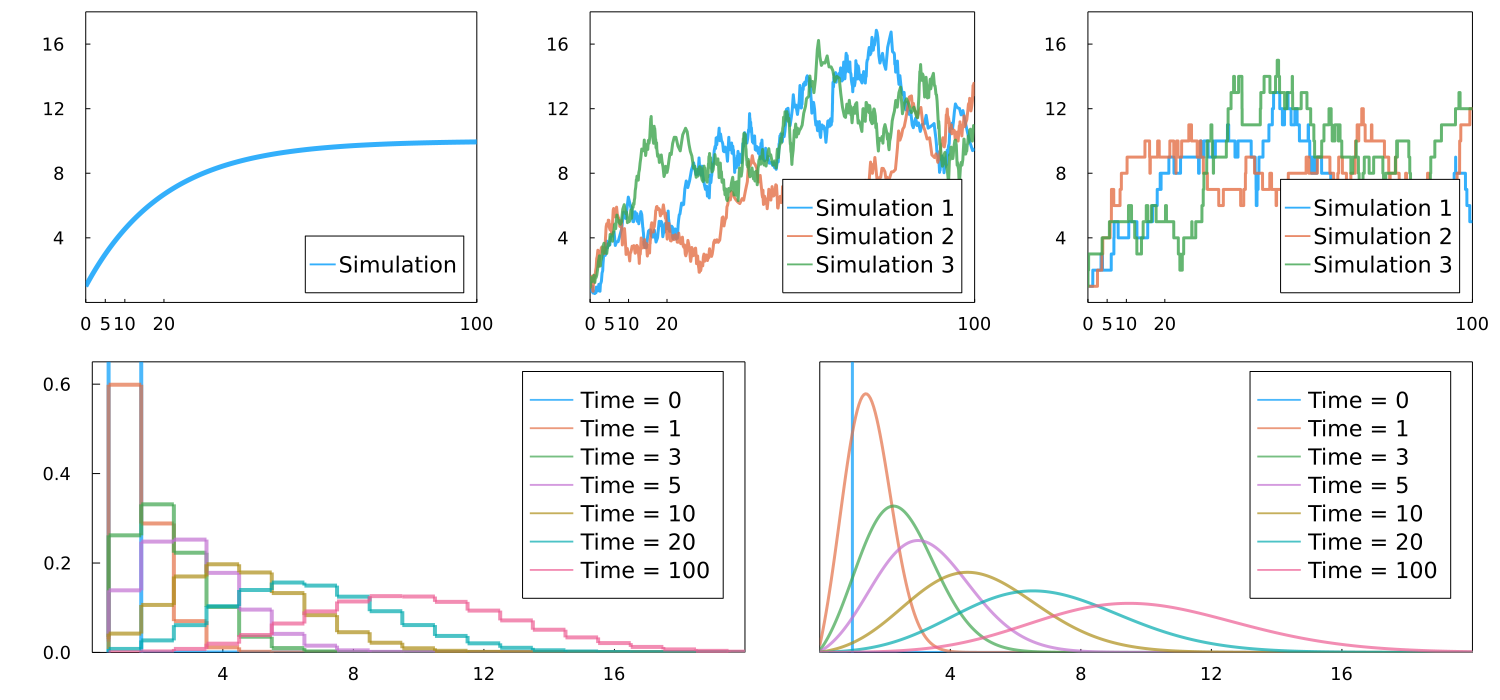

In [26]:
thesis_figure_7 = plot(RRE_interpretation_plot,CLE_interpretation_plot,Gillespie_interpretation_plot,CME_interpretation_plot,CFPE_interpretation_plot,size=(1500,700),xguide="",yguide="",bottom_margin=5mm,left_margin=10mm,right_margin=5mm,tickfontsize=12,layout=@layout[a b c; d e])

## Figure 3

In [12]:
rn = @reaction_network begin
    (k1,k2), X <--> Y
end k1 k2;

In [5]:
function problems(rn,tend,p,u0)
    ode_prob = ODEProblem(rn,Float64.(u0),(0.,tend),p)
    sde_prob = SDEProblem(rn,Float64.(u0),(0.,tend),p)
    jump_prob = JumpProblem(rn,DiscreteProblem(rn,Int64.(u0),(0.,tend),p),Direct());
    return (ode_prob,sde_prob,jump_prob)
end;

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = (::DefaultLinSolve)(x::Vector{Float64}, A::Matrix{Float64}, b::Vector{Float64}, update_matrix::Bool; reltol::Float64, kwargs::Base.Pairs{Symbol, DiffEqBase.ScaleVector{Vector{Float64}}, Tuple{Symbol, Symbol}, NamedTuple{(:Pl, :Pr), Tuple{DiffEqBase.ScaleVector{Vector{Float64}}, DiffEqBase.ScaleVector{Vector{Float64}}}}}) at linear_nonlinear.jl:91
└ @ DiffEqBase /home/torkelloman/.julia/packages/DiffEqBase/Nyo4y/src/linear_nonlinear.jl:91


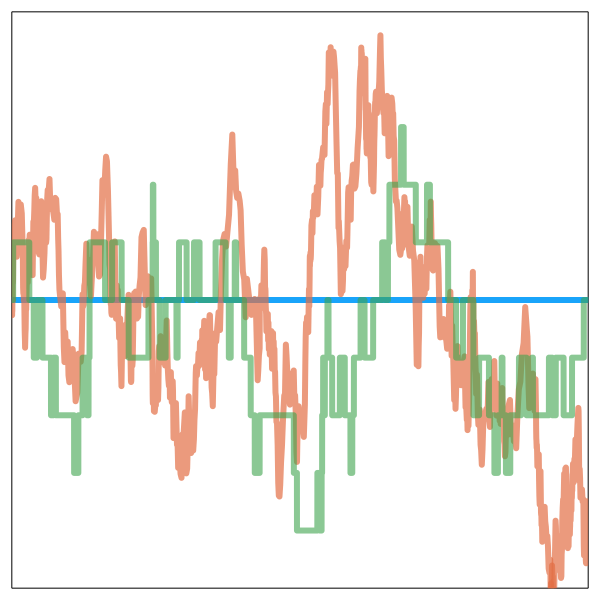

In [6]:
lw = 6;
ode_prob,sde_prob,jump_prob = problems(rn,10.,[1.,1.],[5,5]);
plot(solve(ode_prob,Rosenbrock23()),vars=[1],lw=lw,la=0.9,label="RRE Interpetation",color=1)
plot!(solve(sde_prob,ImplicitEM()),vars=[1],lw=lw,la=0.7,label="CLE Interpretation",color=2,saveat=0.0025)
plot!(solve(jump_prob,SSAStepper()),vars=[1],lw=lw,la=0.6,label="Gillespie Interpretation",color=3)
low_conc_plot = plot!(xguide="",yguide="",legendfontsize=10,ylimit=(0.,10),legend=:none,xticks=[],yticks=[],size=(600,600))

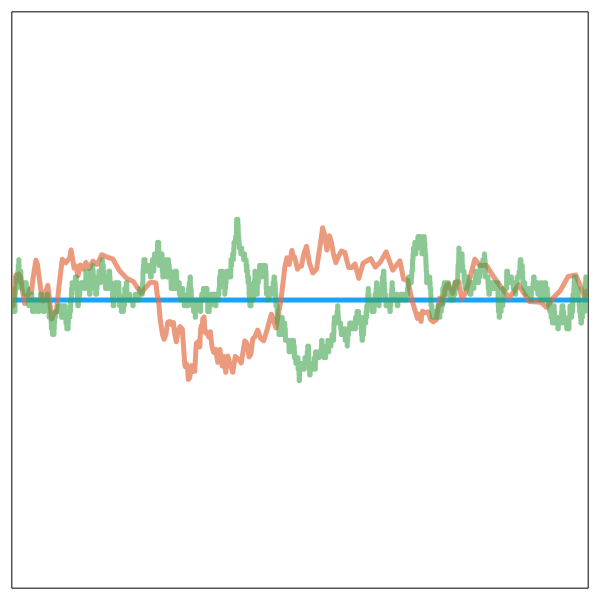

In [7]:
lw = 5;
ode_prob,sde_prob,jump_prob = problems(rn,10.,[1.,1.],[50,50]);
plot(solve(ode_prob,Rosenbrock23()),vars=[1],lw=lw,la=0.9,label="RRE Interpetation",color=1)
plot!(solve(sde_prob,ImplicitEM()),vars=[1],lw=lw,la=0.7,label="CLE Interpretation",color=2,saveat=0.0025)
plot!(solve(jump_prob,SSAStepper()),vars=[1],lw=lw,la=0.6,label="Gillespie Interpretation",color=3)
med_conc_plot = plot!(xguide="",yguide="",legendfontsize=10,ylimit=(0.,100),legend=:none,xticks=[],yticks=[],size=(600,600))

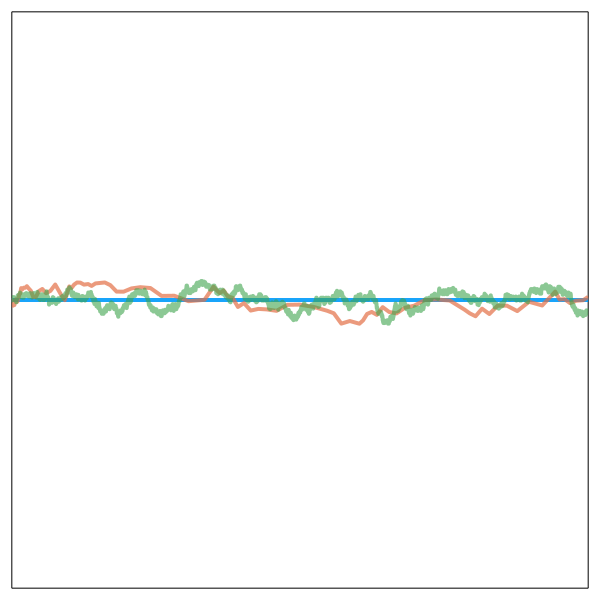

In [8]:
lw = 4;
ode_prob,sde_prob,jump_prob = problems(rn,10.,[1.,1.],[500,500]);
plot(solve(ode_prob,Rosenbrock23()),vars=[1],lw=lw,la=0.9,label="RRE Interpetation",color=1)
plot!(solve(sde_prob,ImplicitEM()),vars=[1],lw=lw,la=0.7,label="CLE Interpretation",color=2,saveat=0.0025)
plot!(solve(jump_prob,SSAStepper()),vars=[1],lw=lw,la=0.6,label="Gillespie Interpretation",color=3)
high_conc_plot = plot!(xguide="",yguide="",legendfontsize=10,ylimit=(0.,1000),legend=:none,xticks=[],yticks=[],size=(600,600))

In [ ]:
savefig(low_conc_plot,"Figures/Figure3/low_concentration.png")
savefig(low_conc_plot,"Figures/Figure3/low_concentration.svg")
savefig(med_conc_plot,"Figures/Figure3/medium_concentration.png")
savefig(med_conc_plot,"Figures/Figure3/medium_concentration.svg")
savefig(high_conc_plot,"Figures/Figure3/high_concentration.png")
savefig(high_conc_plot,"Figures/Figure3/high_high_concentration.svg")

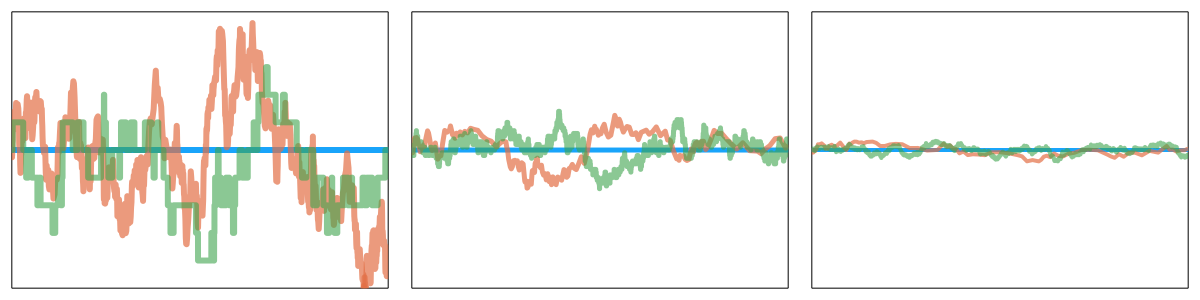

In [9]:
thesis_figure_3 = plot(low_conc_plot,plot!(med_conc_plot,yguide=""),plot!(high_conc_plot,yguide=""),size=(1200,300),layout=(1,3))

In [134]:
savefig(thesis_figure_3,"Figures - Thesis/noise_and_amounts.png")

## CLE Correction Figure

In [7]:
function positive_domain()
    condition(u,t,integrator) = minimum(u) < 0
    affect!(integrator) = integrator.u .= integrator.uprev
    return DiscreteCallback(condition,affect!,save_positions = (false,false))
end;

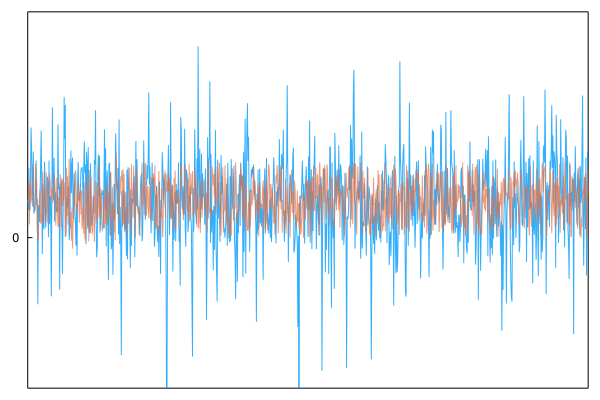

In [110]:
rn_1 = @reaction_network begin
    (k,k), X1 <--> X2
end k
u0_1 = [0.5,0.5];
p_1 = [1.0]
tspan_1 = (0.0,1000.0)
sprob_1 = SDEProblem(rn_1,u0_1,tspan_1,p_1)
sol1_1 = solve(sprob_1,ImplicitEM(),adaptive=false,dt=0.01,saveat=1.0)
sol2_1 = solve(sprob_1,ImplicitEM(),adaptive=false,dt=0.01,saveat=1.0,callback=positive_domain())
sol1_long_1 = solve(sprob_1,ImplicitEM(),adaptive=false,dt=0.01,saveat=0.1)
sol2_long_1 = solve(sprob_1,ImplicitEM(),adaptive=false,dt=0.01,saveat=0.1,callback=positive_domain());
plot(sol1_1,la=0.8,vars=[1],label="")
p1 = plot!(sol2_1,la=0.7,vars=[1],label="",xticks=[],yticks=[0.0],ylimit=(-2.0,3.0),xguide="")

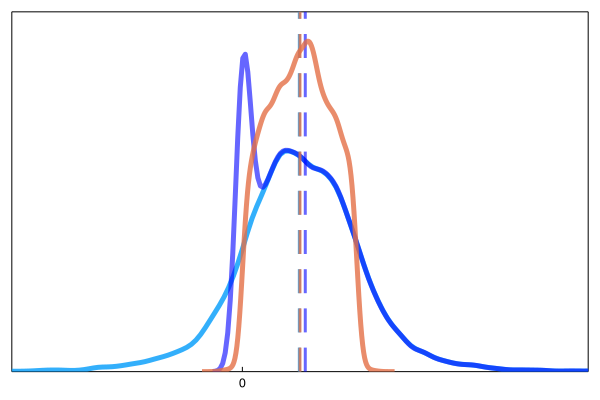

In [111]:
vals1 = first.(sol1_long_1.u); m1 = mean(vals1);
vals2 = max.(0.0,first.(sol1_long_1.u)); m2 = mean(vals2);
vals3 = first.(sol2_long_1.u); m3 = mean(vals3);
ymax = 1.35

density(vals1,label="",color=1,lw=5,la=0.8); plot!([m1,m1],[0.0,ymax],color=1,lw=3,la=0.8,linestyle=:dash,label="")
density!(vals2,label="",color=:blue,lw=5,la=0.6); plot!([m2,m2],[0.0,ymax],color=:blue,lw=3,la=0.6,linestyle=:dash,label="")
p2 = density!(vals3,label="",color=2,lw=5,la=0.8,xlimit=(-2.0,3.0)); plot!([m3,m3],[0.0,ymax],color=2,lw=3,la=0.8,ylimit=(0.0,ymax),linestyle=:dash,label="",xticks=[0.0],yticks=[])

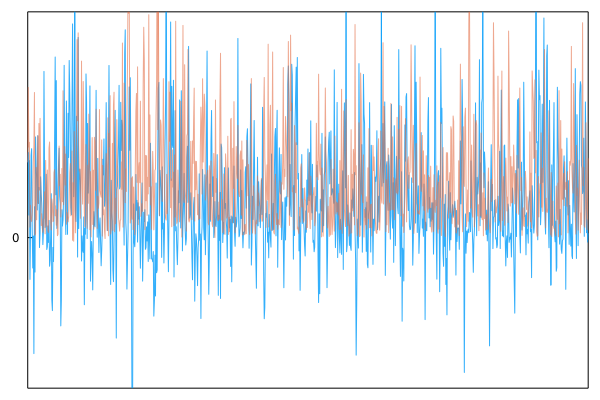

In [112]:
rn_2 = @reaction_network begin
    (p,1), 0 <--> X1
end p
u0_2 = [1.0];
p_2 = [0.5]
tspan_2 = (0.0,1000.0)
sprob_2 = SDEProblem(rn_2,u0_2,tspan_2,p_2)
sol1_2 = solve(sprob_2,ImplicitEM(),adaptive=false,dt=0.01,saveat=1.0)
sol2_2 = solve(sprob_2,ImplicitEM(),adaptive=false,dt=0.01,saveat=1.0,callback=positive_domain())
sol1_long_2 = solve(sprob_2,ImplicitEM(),adaptive=false,dt=0.01,saveat=0.01)
sol2_long_2 = solve(sprob_2,ImplicitEM(),adaptive=false,dt=0.01,saveat=0.01,callback=positive_domain());
plot(sol1_2,la=0.8,vars=[1],label="")
p3 = plot!(sol2_2,la=0.6,vars=[1],label="",xticks=[],yticks=[0.0],ylimit=(-2.0,3.0),xguide="")

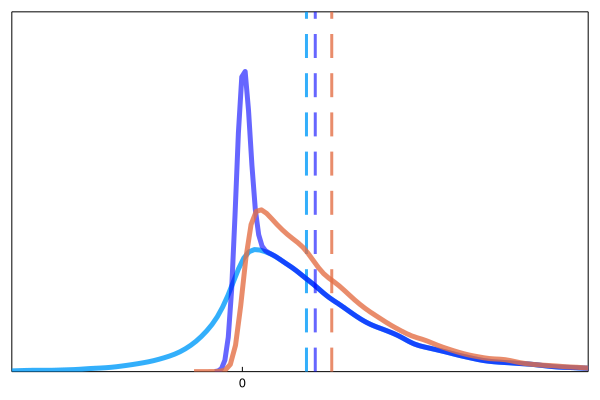

In [113]:
vals1 = first.(sol1_long_2.u); m1 = mean(vals1);
vals2 = max.(0.0,first.(sol1_long_2.u)); m2 = mean(vals2);
vals3 = first.(sol2_long_2.u); m3 = mean(vals3);
ymax = 2.1

density(vals1,label="",color=1,lw=5,la=0.8); plot!([m1,m1],[0.0,ymax],color=1,lw=3,la=0.8,linestyle=:dash,label="")
density!(vals2,label="",color=:blue,lw=5,la=0.6); plot!([m2,m2],[0.0,ymax],color=:blue,lw=3,la=0.6,linestyle=:dash,label="")
p4 = density!(vals3,label="",color=2,lw=5,la=0.8,xlimit=(-2.0,3.0)); plot!([m3,m3],[0.0,ymax],color=2,lw=3,la=0.8,ylimit=(0.0,ymax),linestyle=:dash,label="",xticks=[0.0],yticks=[])

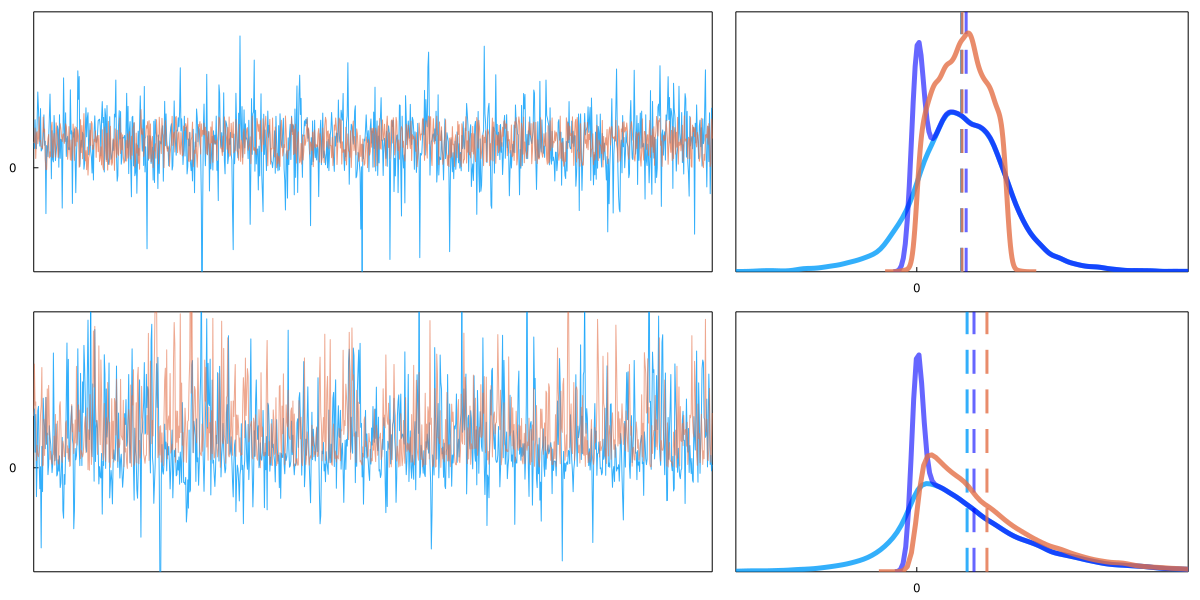

In [115]:
cle_corrections_plot = plot(p1,p2,p3,p4,size=(1200,600),layout=@layout [a{0.6w} b; c d])

In [116]:
savefig(cle_corrections_plot,"Figures/CLE_Corrections/cle_corrections_base.svg")

## Figure 4

In [82]:
v0 = 0.1; v = 1.0; K = 0.5; n = 5;
hillR(x) = v0 + v*(K^n)/(x^n + K^n)
grid = 0.0:0.01:1.5;

ss_val_1 = (v*K^n+v0)/(1+K^n);
ss_val_2 = v0+v*(K^n)/(ss_val_1^n+K^n);

ss_pol_arr = zeros(n+2); ss_pol_arr[end] = 1; ss_pol_arr[end-1] = -v0; ss_pol_arr[2]=K^n; ss_pol_arr[1]=-(K^n)*(v+v0);
ss_pol = Polynomial(ss_pol_arr)
rs = real.(filter(r->(imag(r)==0)&&(real(r)>0),roots(ss_pol)))
ss_val_3 = rs[1];

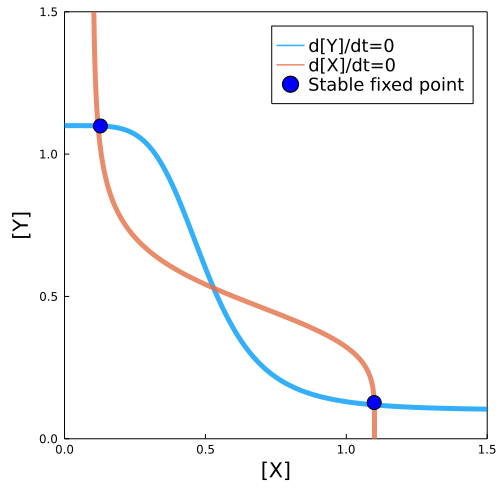

In [87]:
plot(grid,hillR.(grid),lw=5,la=0.8,label="d[Y]/dt=0")
plot!(hillR.(grid),grid,lw=5,la=0.8,label="d[X]/dt=0")
plot!(xguide="[X]",yguide="[Y]",legend=:topright,legendfontsize=12,xlimit=(grid[1],grid[end]),ylimit=(grid[1],grid[end]),size=(500,500))
scatter!([(ss_val_1,ss_val_2),(ss_val_2,ss_val_1)],markersize=8,markershape=:circle,color=:blue,label="Stable fixed point")
#scatter!([(ss_val_3,ss_val_3)],markersize=12,markershape=:cross,color=:red,label="Untable fixed point")

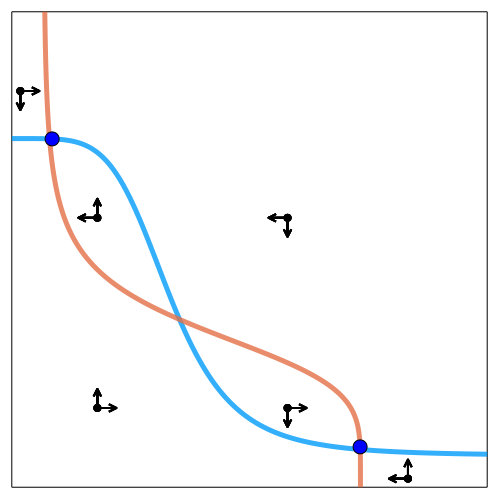

In [91]:
qLx = 0.06; qLy = 0.06;; qW = 2; ms = 5;
(x,y)=(0.27,0.25); (d1,d2)=(1,1); scatter!((x,y),color=:black,label="",markersize=ms); quiver!([x,x],[y,y],quiver=([0.0,d1*qLy],[d2*qLx,0.0]),color=:black,lw=qW)
(x,y)=(0.87,0.85); (d1,d2)=(-1,-1); scatter!((x,y),color=:black,label="",markersize=ms); quiver!([x,x],[y,y],quiver=([0.0,d1*qLy],[d2*qLx,0.0]),color=:black,lw=qW)
(x,y)=(0.27,0.85); (d1,d2)=(-1,1); scatter!((x,y),color=:black,label="",markersize=ms); quiver!([x,x],[y,y],quiver=([0.0,d1*qLy],[d2*qLx,0.0]),color=:black,lw=qW)
(x,y)=(0.87,0.25); (d1,d2)=(1,-1); scatter!((x,y),color=:black,label="",markersize=ms); quiver!([x,x],[y,y],quiver=([0.0,d1*qLy],[d2*qLx,0.0]),color=:black,lw=qW)
(x,y)=(0.027,1.25); (d1,d2)=(1,-1); scatter!((x,y),color=:black,label="",markersize=ms); quiver!([x,x],[y,y],quiver=([0.0,d1*qLy],[d2*qLx,0.0]),color=:black,lw=qW)
(x,y)=(1.25,0.027); (d1,d2)=(-1,1); scatter!((x,y),color=:black,label="",markersize=ms); quiver!([x,x],[y,y],quiver=([0.0,d1*qLy],[d2*qLx,0.0]),color=:black,lw=qW)
thesis_figure_4 = plot!(legend=:none,xguide="",yguide="",xticks=[],yticks=[],size=(500,500))

In [93]:
savefig(thesis_figure_4,"Figures/Figure4/figure4_base.svg")

In [85]:
savefig(thesis_figure_4,"Figures/Figure4/draft.svg")

## Figure 5

In [14]:
# Sets input
rn = @reaction_network begin
    (v0+hill(Y,v,A*K,-n),1), 0 <--> X
    (v0+hill(X,v,K,-n),1), 0 <--> Y
end v0 v K n A
params = [0.1,1.,0.5,3,0.0]
p_span = (0.01,2.0);

In [15]:
# Extracts stuff from input
params_input = [params[1:end-1]...,p_span[1]]
odefun = ODEFunction(convert(ODESystem,rn),jac=true)
F = (u,p) -> odefun(u,p,0)      
J = (u,p) -> odefun.jac(u,p,0)
jet = BifurcationKit.getJet(F, J; matrixfree=false)

u0 = solve(ODEProblem(rn,rand(length(rn.states)),(0.,100.0),params),Rosenbrock23()).u[end]

2-element Vector{Float64}:
 0.1000000007418661
 1.0920634873910209

In [16]:
# Sets options
dsmax = 1e-2
dsmin = 1e-5
ds = sqrt(dsmax*dsmin);
maxSteps = 10000
opts_br = ContinuationPar(pMin = p_span[1], pMax = p_span[2], dsmax = dsmax, dsmin = dsmin, ds=ds, maxSteps=maxSteps,
detectBifurcation = 3, nInversion = 6, maxBisectionSteps = 25,nev = 3);

In [20]:
# Calculates the diagram.
bif1 = bifurcationdiagram(jet..., u0, params_input, (@lens _[5]), 2,
    (x,p,level)->setproperties(opts_br);
    tangentAlgo = SecantPred(),
    recordFromSolution=(x, p) -> x[1], verbosity = 0, plot=false);
bif2 = bifurcationdiagram(jet..., u0, params_input, (@lens _[5]), 2,
    (x,p,level)->setproperties(opts_br);
    tangentAlgo = SecantPred(),
    recordFromSolution=(x, p) -> x[2], verbosity = 0, plot=false);

##################################################
---> Automatic computation of bifurcation diagram

────────────────────────────────────────────────────────────────────────────────
--> New branch, level = 2, dim(Kernel) = 1, code = 0, from bp #1 at p = 1.1724211176876713, type = bp
- #  1,    bp at p ≈ +1.17242112 ∈ (+1.17242112, +1.17242112), |δp|=2e-10, [converged], δ = ( 1,  0), step =  95, eigenelements in eig[ 96], ind_ev =   1
────────────────────────────────────────────────────────────────────────────────
--> New branch, level = 2, dim(Kernel) = 1, code = 0, from bp #2 at p = 0.7760662296901286, type = bp
- #  2,    bp at p ≈ +0.77606623 ∈ (+0.77606622, +0.77606623), |δp|=6e-09, [converged], δ = (-1,  0), step = 146, eigenelements in eig[147], ind_ev =   1


┌ Info: It seems the point is a Saddle-Node bifurcation.
│ The normal form is aδμ + b1⋅x + b2⋅x^2 + b3⋅x^3
│  with coefficients 
│ (a = 0.43570157934357795, b1 = 0.5006483405066593, b2 = 1.7313113634477975, b3 = -2.3857800645195057).
└ @ BifurcationKit /home/torkelloman/.julia/packages/BifurcationKit/DKJDA/src/NormalForms.jl:197
┌ Info: It seems the point is a Saddle-Node bifurcation.
│ The normal form is aδμ + b1⋅x + b2⋅x^2 + b3⋅x^3
│  with coefficients 
│ (a = 0.3933781137369487, b1 = -1.2201443372016338, b2 = -2.028807185783795, b3 = -1.3916839513072592).
└ @ BifurcationKit /home/torkelloman/.julia/packages/BifurcationKit/DKJDA/src/NormalForms.jl:197


##################################################
---> Automatic computation of bifurcation diagram

────────────────────────────────────────────────────────────────────────────────
--> New branch, level = 2, dim(Kernel) = 1, code = 0, from bp #1 at p = 1.1724211176876713, type = bp
- #  1,    bp at p ≈ +1.17242112 ∈ (+1.17242112, +1.17242112), |δp|=2e-10, [converged], δ = ( 1,  0), step =  95, eigenelements in eig[ 96], ind_ev =   1
────────────────────────────────────────────────────────────────────────────────
--> New branch, level = 2, dim(Kernel) = 1, code = 0, from bp #2 at p = 0.7760662296901286, type = bp
- #  2,    bp at p ≈ +0.77606623 ∈ (+0.77606622, +0.77606623), |δp|=6e-09, [converged], δ = (-1,  0), step = 146, eigenelements in eig[147], ind_ev =   1


┌ Info: It seems the point is a Saddle-Node bifurcation.
│ The normal form is aδμ + b1⋅x + b2⋅x^2 + b3⋅x^3
│  with coefficients 
│ (a = 0.43570157934357795, b1 = 0.5006483405066593, b2 = 1.7313113634477975, b3 = -2.3857800645195057).
└ @ BifurcationKit /home/torkelloman/.julia/packages/BifurcationKit/DKJDA/src/NormalForms.jl:197
┌ Info: It seems the point is a Saddle-Node bifurcation.
│ The normal form is aδμ + b1⋅x + b2⋅x^2 + b3⋅x^3
│  with coefficients 
│ (a = 0.3933781137369487, b1 = -1.2201443372016338, b2 = -2.028807185783795, b3 = -1.3916839513072592).
└ @ BifurcationKit /home/torkelloman/.julia/packages/BifurcationKit/DKJDA/src/NormalForms.jl:197


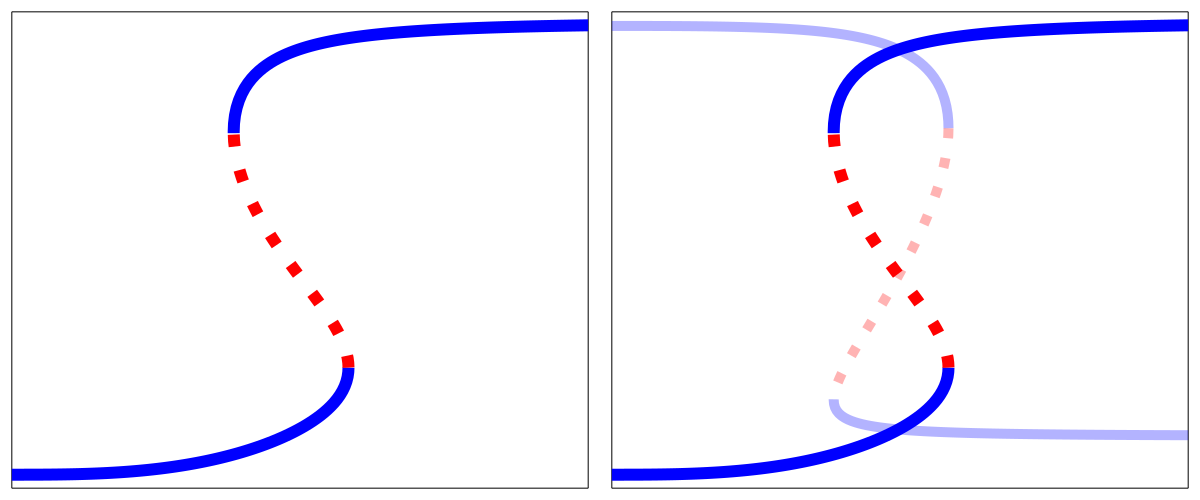

In [50]:
first_unstab = findfirst(getfield.(bif1.γ.branch,:n_unstable).==1)
last_unstab = findlast(getfield.(bif1.γ.branch,:n_unstable).==1);

lw = 12; la = 1.0;
plot(getfield.(bif1.γ.branch,:param)[1:first_unstab],getfield.(bif1.γ.branch,:x)[1:first_unstab],color=:blue,lw=lw,la=la)
plot!(getfield.(bif1.γ.branch,:param)[first_unstab:last_unstab],getfield.(bif1.γ.branch,:x)[first_unstab:last_unstab],color=:red,linestyle=:dot,lw=lw,la=la)
p1 = plot!(getfield.(bif1.γ.branch,:param)[last_unstab:end],getfield.(bif1.γ.branch,:x)[last_unstab:end],color=:blue,lw=lw,la=la,legend=:none,xticks=[],yticks=[])

lw =10; la = 0.3;
first_unstab = findfirst(getfield.(bif2.γ.branch,:n_unstable).==1)
last_unstab = findlast(getfield.(bif2.γ.branch,:n_unstable).==1);

plot(p1)
plot!(getfield.(bif2.γ.branch,:param)[1:first_unstab],getfield.(bif2.γ.branch,:x)[1:first_unstab],color=:blue,lw=lw,la=la)
plot!(getfield.(bif2.γ.branch,:param)[first_unstab:last_unstab],getfield.(bif2.γ.branch,:x)[first_unstab:last_unstab],color=:red,linestyle=:dot,lw=lw,la=la)
p2 = plot!(getfield.(bif2.γ.branch,:param)[last_unstab:end],getfield.(bif2.γ.branch,:x)[last_unstab:end],color=:blue,lw=lw,la=la)

bif_plot = plot(p1,p2,size=(1200,500),xlimit=(0.01,2.0))

In [51]:
savefig(bif_plot,"Figures/Figure5/figure5_base.svg")

In [115]:
savefig(thesis_figure_5,"Figures - Thesis/bifurcation_diagrams.png")